# Count touching neighbors

In this notebook we visualize which cells in a tissue are neighbors by drawing a mesh. Furthermore, we can change the intensity of the mesh so that it corresponds to the distance between the centroids of the cells.

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd

# Test data
Let's generate some tissue-like structure consisting of cells which typically have approximately 6 neighbors.

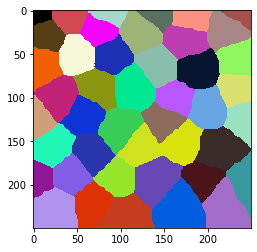

In [2]:
cells = cle.artificial_tissue_2d(
    delta_x=48, 
    delta_y=32, 
    random_sigma_x=7, 
    random_sigma_y=7, 
    width=250, 
    height=250)

cle.imshow(cells, labels=True)

## Mesh between neighboring cells

Before counting neighbors, we should visualize neighbor-relationships. We can do this by drawing a mesh between centroids of touching neighbor cells.

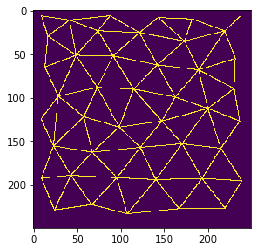

In [3]:
mesh = cle.draw_mesh_between_touching_labels(cells)

cle.imshow(mesh)

We can also combine both visualizations in one image. Note, these images should not be used any further for quantitative analysis. It just serves visualization purposes.

## Centroid connections and cell borders
A common way for visualizing tissues in this context is by drawing cell-borders and the centroid mesh in different colours.

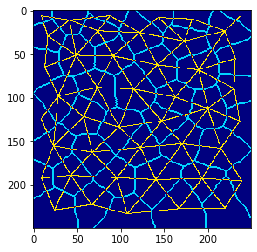

In [4]:
visualization = mesh * 2 + cle.detect_label_edges(cells)

cle.imshow(visualization, color_map='jet')

## Analyze and visualize number of touching neighbors
We can also count the touching neighbors and visualize the result as parametric image in colours.

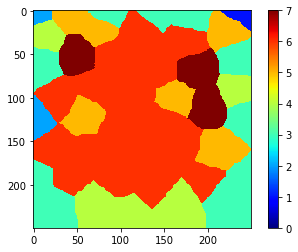

In [5]:
neighbor_count_image = cle.touching_neighbor_count_map(cells)

cle.imshow(neighbor_count_image, color_map='jet', colorbar=True, min_display_intensity=0)

Note, the numbers along the image border may not be accurate. Hence, we should exclude the corresponding cells from the further analysis.

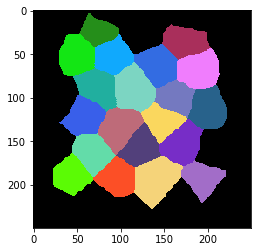

In [6]:
cells_ex_border = cle.exclude_labels_on_edges(cells)

cle.imshow(cells_ex_border, labels=True)

After correcting the label image, we can also correct the parametric image.

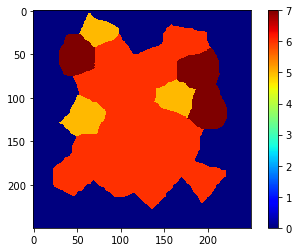

In [7]:
neighbor_count_image_ex_border = neighbor_count_image * (cells_ex_border != 0)

cle.imshow(neighbor_count_image_ex_border, color_map='jet', colorbar=True, min_display_intensity=0)

Now, we can measure the number of neighbors. We can either just read those numbers and put them in a list ...

In [8]:
cle.read_intensities_from_map(cells_ex_border, neighbor_count_image_ex_border)

cl.Array([[0., 5., 6., 7., 6., 6., 7., 6., 6., 5., 5., 6., 6., 7., 6., 6.,
        6., 6., 6., 6., 6.]], dtype=float32)

... we can also read these values together with all other statistics and put them in a pandas DataFrame.

In [9]:
statistics = cle.statistics_of_labelled_pixels(neighbor_count_image_ex_border, cells_ex_border)

table = pd.DataFrame(statistics)

# rename a column
table = table.rename(columns={"mean_intensity": "number_of_neighbors"})

# only filter out a subset of all columns; only what we care
table = table[["label", "number_of_neighbors", "centroid_x", "centroid_y"]]

table

,label,number_of_neighbors,centroid_x,centroid_y
0,1,5.0,74.592697,23.731028
1,2,6.0,173.741379,35.582230
2,3,7.0,49.460915,51.928082
3,4,6.0,91.783768,52.666199
4,5,6.0,142.728210,62.962471
5,6,7.0,189.973206,68.526794
6,7,6.0,73.699181,88.797356
7,8,6.0,115.321083,90.665649
8,9,5.0,163.097733,99.824242
9,10,5.0,58.206852,122.341309


# Exercise
Analyze a larger field of view with more cells and vary the parameters `random_sigma_x` and `random_sigma_y` of the `artificial_tissue_2d` function. Use a touching-neighbor-count map to count the number of touching neighbors before and after applying a median filter to the map.